In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as ticker
from IPython.display import Audio
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

sns.set()
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 200)

In [2]:
#Spotify Features
features = pd.read_excel('Hot 100 Audio Features.xlsx')

In [3]:
#Billboard Top 100 By Week from 1958 to 2021
bb100 = pd.read_csv('Hot Stuff.csv')

In [4]:
#Convert 'WeekID' to DateTime Object & Check First & Last 2 entries by Week/Year
bb100['WeekID'] = pd.DatetimeIndex(bb100['WeekID'])
bb100.sort_values(by='WeekID').iloc[np.r_[0:2, -2:0]]

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
18553,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,63,High School Confidential,Jerry Lee Lewis And His Pumping Piano,High School ConfidentialJerry Lee Lewis And His Pumping Piano,1,NaN,63,1
103337,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,98,Little Serenade,The Ames Brothers,Little SerenadeThe Ames Brothers,1,NaN,98,1
300806,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,61,Almost Maybes,Jordan Davis,Almost MaybesJordan Davis,2,64.0,61,17
152154,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,78,White Teeth,YoungBoy Never Broke Again,White TeethYoungBoy Never Broke Again,1,NaN,78,1


In [5]:
#Merge BB100 with Spotify Features
bb100_features = pd.merge(bb100, features, on='SongID', how='left')
bb100_features.sort_values(by='WeekID').iloc[np.r_[0:2, -2:0]]

,url,WeekID,Week Position,Song_x,Performer_x,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Performer_y,Song_y,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
11977,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,89,Blue Boy,Jim Reeves,Blue BoyJim Reeves,1,NaN,89,1,Jim Reeves,Blue Boy,"['adult standards', 'nashville sound', 'rock-and-roll']",05k40oRJ58mQBJSAz0FkLI,https://p.scdn.co/mp3-preview/80d3e13c406f8251e5bee84366353b09f630dfff?cid=b8d3901151d34489a160e3cf0ab1fa94,129333.0,0.0,The Essential Jim Reeves,0.613,0.372,0.0,-13.051,1.0,0.0299,0.7850,0.00154,0.115,0.697,98.549,4.0,24.0
1014,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,6,Rebel-'rouser,Duane Eddy His Twangy Guitar And The Rebels,Rebel-'rouserDuane Eddy His Twangy Guitar And The Rebels,1,NaN,6,1,Duane Eddy His Twangy Guitar And The Rebels,Rebel-'rouser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263155,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,70,Quicksand,Morray,QuicksandMorray,1,66.0,65,15,Morray,Quicksand,[],4iCZ6Cr76For1TuHUQ90r8,https://p.scdn.co/mp3-preview/5145f491144ef1468d624cfc0203c2d22ba896dc?cid=b8d3901151d34489a160e3cf0ab1fa94,224933.0,1.0,"{'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/44vREmJC0OlVZjZaGLqVEd'}, 'href': 'https://api.spotify.com/v1/artists/44vREmJC0OlVZjZaGLqVEd', 'i...",0.901,0.656,4.0,-7.452,0.0,0.2770,0.0807,0.00000,0.181,0.599,119.956,4.0,71.0
7816,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,28,hunger.on.hillside,J. Cole & Bas,hunger.on.hillsideJ. Cole & Bas,1,NaN,28,1,J. Cole & Bas,hunger.on.hillside,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_genre = bb100_features[['SongID', 'spotify_genre', 'Week Position']]
df_genre.isnull().sum()

SongID               0
spotify_genre    14586
Week Position        0
dtype: int64

In [7]:
df_genre['spotify_genre'].replace({"[]":np.nan}, inplace=True)
#df_genre['spotify_genre'].value_counts()
df_genre.isnull().sum()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


SongID               0
spotify_genre    37651
Week Position        0
dtype: int64

In [8]:
df_genre.dropna(subset=['spotify_genre'], inplace=True)
df_genre.isnull().sum()

/opt/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


SongID           0
spotify_genre    0
Week Position    0
dtype: int64

In [9]:
#Noticing that Spotify_Genre Values is an Array
arr = df_genre['spotify_genre'].values

In [10]:
#Important Conversion to list of genres for items in Array
out = [i.replace('\'', '').replace('[','').replace(']','').replace('"','').split(", ") for i in arr]

In [11]:
#Apply "Explode" on new Dataframe with Key Inputs: 
Genres_Explode = pd.DataFrame({'SongID':df_genre.SongID, 'BB_Rank':df_genre['Week Position'], 'Genres':out}).explode('Genres')

In [12]:
#View Result of Exploding
Genres_Explode

,SongID,BB_Rank,Genres
0,Don't Just Stand TherePatty Duke,34,deep adult standards
1,Don't Just Stand TherePatty Duke,22,deep adult standards
2,Don't Just Stand TherePatty Duke,14,deep adult standards
3,Don't Just Stand TherePatty Duke,10,deep adult standards
4,Don't Just Stand TherePatty Duke,8,deep adult standards
...,...,...,...
330459,Here I Am Come & Take MeAl Green,22,memphis soul
330459,Here I Am Come & Take MeAl Green,22,quiet storm
330459,Here I Am Come & Take MeAl Green,22,soul
330459,Here I Am Come & Take MeAl Green,22,soul blues


In [13]:
#Merge Genres_Explode with Spotify Features
Genre_Features = pd.merge(Genres_Explode, features, on='SongID', how='left')
Genre_Features

,SongID,BB_Rank,Genres,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
0,Don't Just Stand TherePatty Duke,34,deep adult standards,Patty Duke,Don't Just Stand There,['deep adult standards'],1YhNCQ3XOdTCZgubfX8PgB,NaN,163160.0,0.0,Lost Hits Of The 60's (All Original Artists & Versions),0.574,0.256,7.0,-15.044,1.0,0.0298,0.610,0.000077,0.1000,0.568,82.331,3.0,21.0
1,Don't Just Stand TherePatty Duke,22,deep adult standards,Patty Duke,Don't Just Stand There,['deep adult standards'],1YhNCQ3XOdTCZgubfX8PgB,NaN,163160.0,0.0,Lost Hits Of The 60's (All Original Artists & Versions),0.574,0.256,7.0,-15.044,1.0,0.0298,0.610,0.000077,0.1000,0.568,82.331,3.0,21.0
2,Don't Just Stand TherePatty Duke,14,deep adult standards,Patty Duke,Don't Just Stand There,['deep adult standards'],1YhNCQ3XOdTCZgubfX8PgB,NaN,163160.0,0.0,Lost Hits Of The 60's (All Original Artists & Versions),0.574,0.256,7.0,-15.044,1.0,0.0298,0.610,0.000077,0.1000,0.568,82.331,3.0,21.0
3,Don't Just Stand TherePatty Duke,10,deep adult standards,Patty Duke,Don't Just Stand There,['deep adult standards'],1YhNCQ3XOdTCZgubfX8PgB,NaN,163160.0,0.0,Lost Hits Of The 60's (All Original Artists & Versions),0.574,0.256,7.0,-15.044,1.0,0.0298,0.610,0.000077,0.1000,0.568,82.331,3.0,21.0
4,Don't Just Stand TherePatty Duke,8,deep adult standards,Patty Duke,Don't Just Stand There,['deep adult standards'],1YhNCQ3XOdTCZgubfX8PgB,NaN,163160.0,0.0,Lost Hits Of The 60's (All Original Artists & Versions),0.574,0.256,7.0,-15.044,1.0,0.0298,0.610,0.000077,0.1000,0.568,82.331,3.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1523103,Here I Am Come & Take MeAl Green,22,memphis soul,Al Green,Here I Am Come & Take Me,"['classic soul', 'funk', 'memphis soul', 'quiet storm', 'soul', 'soul blues', 'southern soul']",20wu6USlvWRghMOvUdfLgE,https://p.scdn.co/mp3-preview/37dbfd6ef26ecbbdaf4c9564ef8a5230767308ae?cid=b8d3901151d34489a160e3cf0ab1fa94,256693.0,0.0,Call Me,0.815,0.388,11.0,-12.238,0.0,0.0364,0.318,0.000084,0.0673,0.846,94.558,4.0,52.0
1523104,Here I Am Come & Take MeAl Green,22,quiet storm,Al Green,Here I Am Come & Take Me,"['classic soul', 'funk', 'memphis soul', 'quiet storm', 'soul', 'soul blues', 'southern soul']",20wu6USlvWRghMOvUdfLgE,https://p.scdn.co/mp3-preview/37dbfd6ef26ecbbdaf4c9564ef8a5230767308ae?cid=b8d3901151d34489a160e3cf0ab1fa94,256693.0,0.0,Call Me,0.815,0.388,11.0,-12.238,0.0,0.0364,0.318,0.000084,0.0673,0.846,94.558,4.0,52.0
1523105,Here I Am Come & Take MeAl Green,22,soul,Al Green,Here I Am Come & Take Me,"['classic soul', 'funk', 'memphis soul', 'quiet storm', 'soul', 'soul blues', 'southern soul']",20wu6USlvWRghMOvUdfLgE,https://p.scdn.co/mp3-preview/37dbfd6ef26ecbbdaf4c9564ef8a5230767308ae?cid=b8d3901151d34489a160e3cf0ab1fa94,256693.0,0.0,Call Me,0.815,0.388,11.0,-12.238,0.0,0.0364,0.318,0.000084,0.0673,0.846,94.558,4.0,52.0
1523106,Here I Am Come & Take MeAl Green,22,soul blues,Al Green,Here I Am Come & Take Me,"['classic soul', 'funk', 'memphis soul', 'quiet storm', 'soul', 'soul blues', 'southern soul']",20wu6USlvWRghMOvUdfLgE,https://p.scdn.co/mp3-preview/37dbfd6ef26ecbbdaf4c9564ef8a5230767308ae?cid=b8d3901151d34489a160e3cf0ab1fa94,256693.0,0.0,Call Me,0.815,0.388,11.0,-12.238,0.0,0.0364,0.318,0.000084,0.0673,0.846,94.558,4.0,52.0


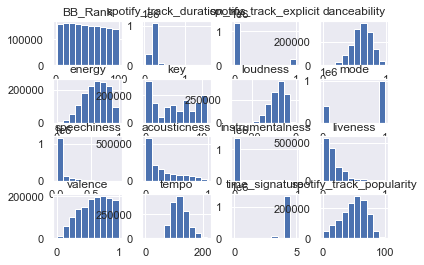

In [14]:
Genre_Features.hist();

In [15]:
Genre_Features[['Genres', 'BB_Rank', 'spotify_track_popularity']]

,Genres,BB_Rank,spotify_track_popularity
0,deep adult standards,34,21.0
1,deep adult standards,22,21.0
2,deep adult standards,14,21.0
3,deep adult standards,10,21.0
4,deep adult standards,8,21.0
...,...,...,...
1523103,memphis soul,22,52.0
1523104,quiet storm,22,52.0
1523105,soul,22,52.0
1523106,soul blues,22,52.0


In [16]:
Grouped = Genre_Features[['Genres', 'BB_Rank', 'spotify_track_popularity']].groupby('Genres').agg(['mean', 'count'])
Grouped = Grouped.dropna()

In [17]:
Grouped = Grouped.reset_index()

In [18]:
Grouped

Genres    BB_Rank       spotify_track_popularity      
                           mean count                     mean count
0         a cappella  49.268987   316                40.216867   249
1         acid house  55.772152    79                32.189873    79
2          acid jazz  61.463158    95                34.576471    85
3     acoustic blues  68.432432    37                31.095238    21
4       acoustic pop  51.143077  1300                60.770736  1278
...              ...        ...   ...                      ...   ...
1037      yacht rock  45.191232  8440                44.295755  8081
1038           ye ye  62.458333    24                 4.058824    17
1039        yodeling  55.892944   411                23.787004   277
1040   yugoslav rock  51.944444   162                18.836538   104
1041            zolo  57.500000   520                46.564417   489

[1042 rows x 5 columns]

In [19]:
Genres = Grouped.Genres
Genres

0           a cappella
1           acid house
2            acid jazz
3       acoustic blues
4         acoustic pop
             ...      
1037        yacht rock
1038             ye ye
1039          yodeling
1040     yugoslav rock
1041              zolo
Name: Genres, Length: 1042, dtype: object

In [20]:
BB_Popularity = (100 - Grouped['BB_Rank']['mean'])
BB_Popularity

0       50.731013
1       44.227848
2       38.536842
3       31.567568
4       48.856923
          ...    
1037    54.808768
1038    37.541667
1039    44.107056
1040    48.055556
1041    42.500000
Name: mean, Length: 1042, dtype: float64

In [21]:
count = Grouped['BB_Rank']['count']
count

0        316
1         79
2         95
3         37
4       1300
        ... 
1037    8440
1038      24
1039     411
1040     162
1041     520
Name: count, Length: 1042, dtype: int64

In [22]:
popularity = Grouped['spotify_track_popularity']['mean']
popularity

0       40.216867
1       32.189873
2       34.576471
3       31.095238
4       60.770736
          ...    
1037    44.295755
1038     4.058824
1039    23.787004
1040    18.836538
1041    46.564417
Name: mean, Length: 1042, dtype: float64

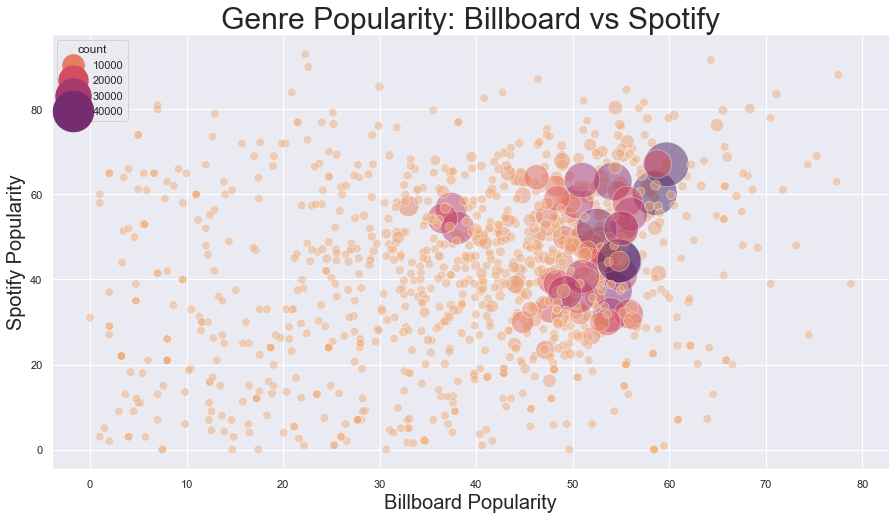

In [23]:
#Bubble Plot for Genre Size and Relative Popularity on Billboard vs Spotify
plt.figure(figsize=(15,8))
plt.title('Genre Popularity: Billboard vs Spotify', fontsize=30)
plt.xlabel('Billboard Popularity', fontsize=20)
plt.ylabel('Spotify Popularity', fontsize=20)
sns.scatterplot(x=BB_Popularity, y=popularity, size=count, 
                sizes=(75,2000), alpha=0.5, hue=count, palette='flare', legend='brief')
plt.savefig('Genre_BB_vs_S.png');


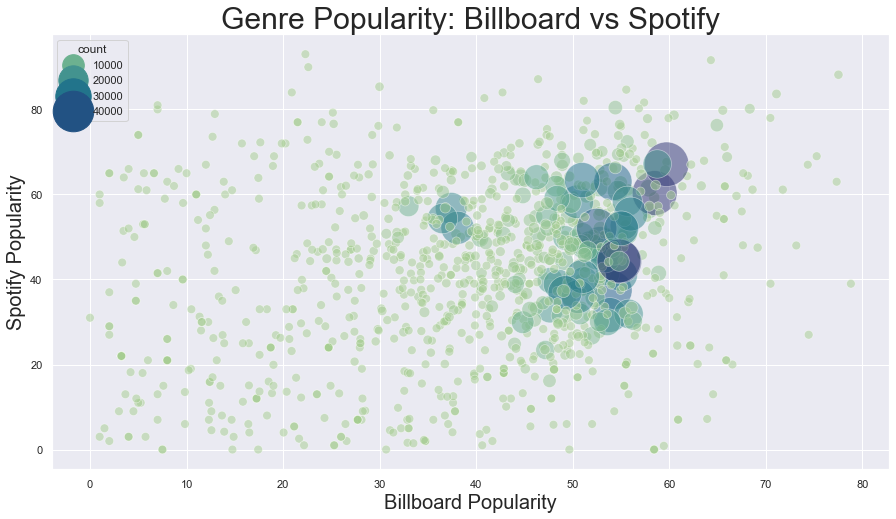

In [24]:
#Bubble Plot for Genre Size and Relative Popularity on Billboard vs Spotify
plt.figure(figsize=(15,8))
plt.title('Genre Popularity: Billboard vs Spotify', fontsize=30)
plt.xlabel('Billboard Popularity', fontsize=20)
plt.ylabel('Spotify Popularity', fontsize=20)
sns.scatterplot(x=BB_Popularity, y=popularity, size=count, 
                sizes=(75,2000), alpha=0.5, hue=count, palette='crest', legend='brief');

In [25]:
from scipy import stats
stats.pearsonr(BB_Popularity, popularity)

(0.22478017709593445, 2.1145734146328885e-13)

In [26]:
features.shape

(29503, 22)

In [27]:
bb100.shape

(327895, 10)

In [28]:
#Add BB Song info to Spotify Features
features_bb100 = pd.merge(features, bb100, on='SongID', how='left').drop_duplicates(subset='SongID')
features_bb100.sort_values(by='WeekID').iloc[np.r_[0:2, -2:0]]

,SongID,Performer_x,Song_x,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,url,WeekID,Week Position,Song_y,Performer_y,Instance,Previous Week Position,Peak Position,Weeks on Chart
109762,High School ConfidentialJerry Lee Lewis And His Pumping Piano,Jerry Lee Lewis And His Pumping Piano,High School Confidential,[],60vMDOD7YoyUUfN4r1BeJx,https://p.scdn.co/mp3-preview/c30d92ed3848ef260a71cef5645d8554d43c3141?cid=b8d3901151d34489a160e3cf0ab1fa94,150026.0,0.0,Sun Records 60th Anniversary,0.608,0.920,10.0,-6.792,1.0,0.0422,0.714,0.00000,0.1380,0.965,92.385,4.0,0.0,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,63.0,High School Confidential,Jerry Lee Lewis And His Pumping Piano,1.0,NaN,63.0,1.0
268727,That's How Much I Love YouPat Boone,Pat Boone,That's How Much I Love You,"['adult standards', 'brill building pop', 'easy listening', 'lounge', 'rock-and-roll', 'rockabilly']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,39.0,That's How Much I Love You,Pat Boone,1.0,NaN,39.0,1.0
102632,Have A Little Mercy4,4,Have A Little Mercy,['trap'],0FC0LDm1bS5lqefvPps3hz,https://p.scdn.co/mp3-preview/e611df43a6e43bf7c0e3726053e10859df0b3477?cid=b8d3901151d34489a160e3cf0ab1fa94,334040.0,0.0,Alvin Stone / Night People,0.445,0.338,7.0,-14.096,1.0,0.0307,0.247,0.00058,0.0883,0.227,84.392,1.0,3.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298632,Vanilla �layJackie DeShannon,Jackie DeShannon,Vanilla Ólay,"['brill building pop', 'bubblegum pop', 'merseybeat']",38SctZyQGZqE2yC9fNdzyD,https://p.scdn.co/mp3-preview/3a012ff9a47599c32ae97bfca07211f5a431c394?cid=b8d3901151d34489a160e3cf0ab1fa94,182066.0,0.0,Jackie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
features_bb100.head(5)

,SongID,Performer_x,Song_x,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,url,WeekID,Week Position,Song_y,Performer_y,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.billboard.com/charts/hot-100/1962-05-05,1962-05-05,92.0,-twistin'-White Silver Sands,Bill Black's Combo,1.0,NaN,92.0,1.0
2,¿Dònde Està Santa Claus? (Where Is Santa Claus?)Augie Rios,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.billboard.com/charts/hot-100/1958-12-13,1958-12-13,66.0,¿Dònde Està Santa Claus? (Where Is Santa Claus?),Augie Rios,1.0,NaN,66.0,1.0
6,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'easy listening', 'mellow gold']",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e5312be7ccce98176cff46d7879?cid=b8d3901151d34489a160e3cf0ab1fa94,166106.0,0.0,The Essential Andy Williams,0.154,0.185,5.0,-14.063,1.0,0.0315,0.91100,0.000267,0.112,0.150,83.969,4.0,38.0,http://www.billboard.com/charts/hot-100/1965-04-03,1965-04-03,78.0,......And Roses And Roses,Andy Williams,1.0,NaN,78.0,1.0
13,...And Then There Were DrumsSandy Nelson,Sandy Nelson,...And Then There Were Drums,"['rock-and-roll', 'space age pop', 'surf music']",1fHHq3qHU8wpRKHzhojZ4a,NaN,172066.0,0.0,Compelling Percussion,0.588,0.672,11.0,-17.278,0.0,0.0361,0.00256,0.745000,0.145,0.801,121.962,4.0,11.0,http://www.billboard.com/charts/hot-100/1962-09-22,1962-09-22,88.0,...And Then There Were Drums,Sandy Nelson,1.0,NaN,88.0,1.0
17,...Baby One More TimeBritney Spears,Britney Spears,...Baby One More Time,"['dance pop', 'pop', 'post-teen pop']",3MjUtNVVq3C8Fn0MP3zhXa,https://p.scdn.co/mp3-preview/da2134a161f1cb34d17c2d6d7e77cc93d1c1e6f7?cid=b8d3901151d34489a160e3cf0ab1fa94,211066.0,0.0,...Baby One More Time (Digital Deluxe Version),0.759,0.699,0.0,-5.745,0.0,0.0307,0.20200,0.000131,0.443,0.907,92.960,4.0,77.0,http://www.billboard.com/charts/hot-100/1998-11-21,1998-11-21,17.0,...Baby One More Time,Britney Spears,1.0,NaN,17.0,1.0


In [30]:
Song_BB_Popularity = (100 - features_bb100['Week Position'])
Song_BB_Popularity

0          8.0
2         34.0
6         22.0
13        12.0
17        83.0
          ... 
330345    35.0
330346     1.0
330347    22.0
330359    18.0
330371    14.0
Name: Week Position, Length: 29386, dtype: float64

In [31]:
Song_Spotify_Popularity = features_bb100.spotify_track_popularity
Song_Spotify_Popularity

0          NaN
2          NaN
6         38.0
13        11.0
17        77.0
          ... 
330345     NaN
330346    51.0
330347     NaN
330359    35.0
330371    28.0
Name: spotify_track_popularity, Length: 29386, dtype: float64

In [32]:
feat_bb100 = pd.DataFrame({'BB_Pop':Song_BB_Popularity, 'Spot_Pop':Song_Spotify_Popularity})
feat_bb100 = feat_bb100.dropna()
feat_bb100

,BB_Pop,Spot_Pop
6,22.0,38.0
13,12.0,11.0
17,83.0,77.0
49,96.0,73.0
68,44.0,61.0
...,...,...
330307,15.0,5.0
330327,46.0,74.0
330346,1.0,51.0
330359,18.0,35.0


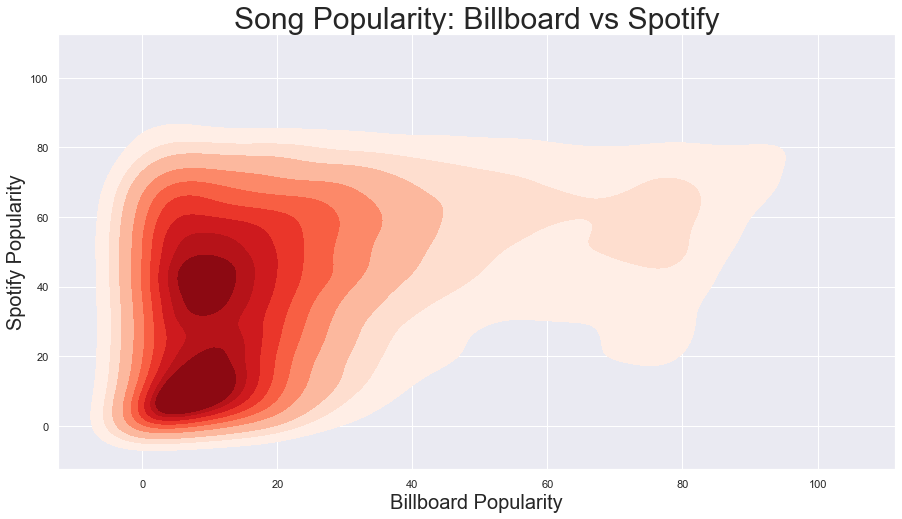

In [33]:
#KDE Plot for Each Song's Relative Popularity on Billboard vs Spotify
plt.figure(figsize=(15,8))
plt.title('Song Popularity: Billboard vs Spotify', fontsize=30)
plt.xlabel('Billboard Popularity', fontsize=20)
plt.ylabel('Spotify Popularity', fontsize=20)
sns.kdeplot(data=feat_bb100, x='BB_Pop', y='Spot_Pop', cmap="Reds", shade=True);

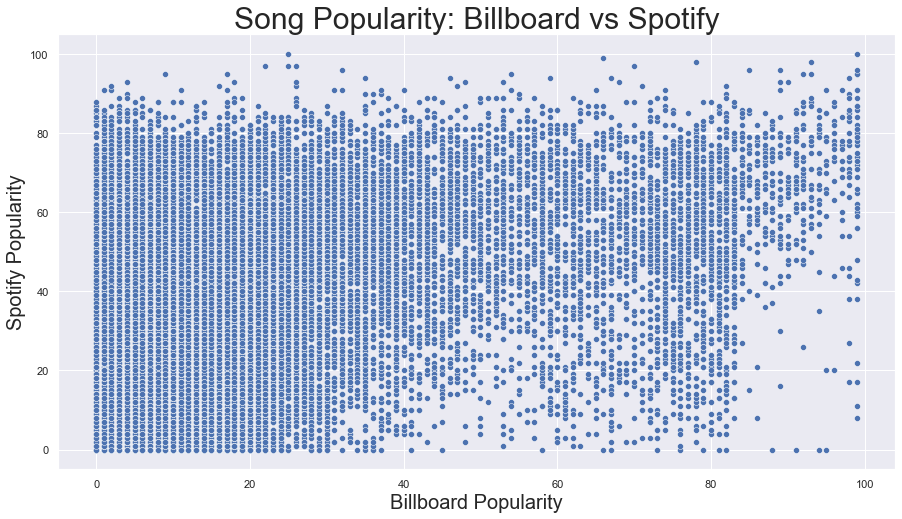

In [34]:
#Scatter Plot for Each Song's Relative Popularity on Billboard vs Spotify
plt.figure(figsize=(15,8))
plt.title('Song Popularity: Billboard vs Spotify', fontsize=30)
plt.xlabel('Billboard Popularity', fontsize=20)
plt.ylabel('Spotify Popularity', fontsize=20)
sns.scatterplot(data=feat_bb100, x='BB_Pop', y='Spot_Pop');